In [14]:
import sys
from pathlib import Path

AVES_ROOT = Path("../../..") if not "google.colab" in sys.modules else Path("aves_git")

EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"
EOD_PATH

PosixPath('../../../data/external/EOD_STGO')

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

from aves.visualization.tables import barchart

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 120
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"

In [16]:
zones = gpd.read_file(AVES_ROOT / "data" / "processed" / "scl_zonas_urbanas.json")
zones["Comuna"].unique()

array(['El Bosque', 'San Bernardo', 'La Florida', 'Peñalolén',
       'Puente Alto', 'Pirque', 'La Pintana', 'La Granja', 'Maipú',
       'Cerrillos', 'Padre Hurtado', 'San Ramón', 'La Cisterna', 'Buin',
       'Calera de Tango', 'Talagante', 'El Monte', 'Isla de Maipo',
       'Peñaflor', 'Cerro Navia', 'Pudahuel', 'Renca', 'Quinta Normal',
       'Quilicura', 'Colina', 'Huechuraba', 'Lampa', 'Las Condes',
       'Providencia', 'La Reina', 'Lo Barnechea', 'Vitacura',
       'Independencia', 'Recoleta', 'Santiago', 'Pedro Aguirre Cerda',
       'San Miguel', 'Conchalí', 'San Joaquín', 'Lo Espejo',
       'Estación Central', 'Lo Prado', 'Ñuñoa', 'Macul'], dtype=object)

In [17]:
from aves.data import eod

viajes = eod.read_trips(EOD_PATH)
personas = eod.read_people(EOD_PATH)

viajes["TripWeight"] = 1

In [18]:
viajes.columns

Index(['Hogar', 'Persona', 'Viaje', 'Etapas', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'MediosUsados',
       'ModoAgregado', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
       'HoraMedia', 'TiempoViaje', 'TiempoMedio', 'Periodo', 'MinutosDespues',
       'CuadrasDespues', 'FactorLaboralNormal', 'FactorSabadoNormal',
       'FactorDomingoNormal', 'FactorLaboralEstival',
       'FactorFindesemanaEstival', 'CodigoTiempo', 'ModoDifusion',
       'DistEuclidiana', 'DistManhattan', 'Imputada', 'TripWeight'],
      dtype='object')

In [19]:
viajes[['ZonaOrigen', 'ComunaOrigen', 'ZonaDestino', 'ComunaDestino', 'ModoAgregado', 'TiempoViaje', 'Periodo', 'FactorLaboralNormal']].sample(5)

,ZonaOrigen,ComunaOrigen,ZonaDestino,ComunaDestino,ModoAgregado,TiempoViaje,Periodo,FactorLaboralNormal
12654,130,Estación Central,133,Estación Central,Bus TS,20.0,Punta Mañana 2 (7:31 - 9:00),0.817907
9400,291,Las Condes,770,San Bernardo,Bus TS - Metro,60.0,Punta Tarde (17:31 - 20:30),1.052764
25101,244,La Granja,237,La Granja,Auto,15.0,Punta Tarde (17:31 - 20:30),1.143880
89282,560,Quinta Normal,573,Quinta Normal,Otros,45.0,"Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30,...",1.000000
77398,701,Puente Alto,722,Puente Alto,Bus TS,40.0,Punta Mañana 1 (6:01 - 7:30),1.420428


In [20]:
viajes[['ZonaOrigen', 'ComunaOrigen', 'ZonaDestino', 'ComunaDestino', 'ModoAgregado', 'TiempoViaje', 'Periodo', 'Proposito']]

,ZonaOrigen,ComunaOrigen,ZonaDestino,ComunaDestino,ModoAgregado,TiempoViaje,Periodo,Proposito
0,400,Maipú,407,Maipú,Bus TS,70.0,Noche (23:01 - 06:00),volver a casa
1,407,Maipú,307,Las Condes,Bus TS - Metro,105.0,"Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30,...",Al trabajo
2,307,Las Condes,407,Maipú,Bus TS - Metro,90.0,"Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30,...",volver a casa
3,407,Maipú,437,Ñuñoa,Bus TS - Metro,55.0,"Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30,...",Al trabajo
4,437,Ñuñoa,407,Maipú,Bus TS - Metro,150.0,Punta Tarde (17:31 - 20:30),volver a casa
...,...,...,...,...,...,...,...,...
113586,235,La Granja,244,La Granja,Caminata,15.0,"Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30,...",volver a casa
113587,244,La Granja,235,La Granja,Caminata,5.0,Fuera de Punta 1 (10:01 - 12:00),De compras
113588,235,La Granja,244,La Granja,Caminata,15.0,"Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30,...",volver a casa
113589,235,La Granja,235,La Granja,Bicicleta,10.0,Punta Mañana 2 (7:31 - 9:00),Al trabajo


In [46]:
viajes2 = viajes[['OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY', 'HoraIni']].dropna()
viajes2["HoraIni"] = viajes2["HoraIni"].apply(lambda x: pd.to_timedelta(x)/pd.offsets.Minute(1))
viajes2

,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,HoraIni
0,335208.7188,6288387.0,338812.3125,6292391.0,1350.0
1,338536.4375,6291928.0,354267.3438,6302297.0,780.0
2,354267.3438,6302297.0,338536.4375,6291928.0,1320.0
3,338536.4375,6291928.0,350841.6563,6297212.0,540.0
4,350841.6563,6297212.0,338536.4375,6291928.0,1140.0
...,...,...,...,...,...
113584,338450.4063,6299725.5,338536.5625,6299639.5,760.0
113585,349410.2813,6289669.0,349556.9063,6290333.5,630.0
113586,349556.9063,6290333.5,349410.2813,6289669.0,720.0
113587,349410.2813,6289669.0,349556.9063,6290333.5,630.0


In [43]:
viajes_short = viajes[['ComunaOrigen', 'ComunaDestino', 'MediosUsados', 'ModoAgregado', 'Periodo']]
viajes_short = (viajes_short
             .groupby(['ComunaOrigen', 'ComunaDestino', 'Periodo', 'ModoAgregado'])
             .size()
             .unstack()
             .fillna(0)
             )

viajes_short = viajes_short.div(viajes_short.sum(axis=1), axis=0)

viajes_short

ModoAgregado                                                                       Auto  \
ComunaOrigen ComunaDestino Periodo                                                        
Buin         Buin          Fuera de Punta 1 (10:01 - 12:00)                    0.163043   
                           Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, ...  0.176966   
                           Noche (23:01 - 06:00)                               0.235294   
                           Punta Mañana 1 (6:01 - 7:30)                        0.268293   
                           Punta Mañana 2 (7:31 - 9:00)                        0.148515   
...                                                                                 ...   
Ñuñoa        Ñuñoa         Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, ...  0.381872   
                           Noche (23:01 - 06:00)                               0.250000   
                           Punta Mañana 1 (6:01 - 7:30)                        0.322581   
                           Punta Mañana 2 (7:31 - 9:00)                        0.453846   
                           Punta Tarde (17:31 - 20:30)                         0.363985   

ModoAgregado                                                                   Auto - Metro  \
ComunaOrigen ComunaDestino Periodo                                                            
Buin         Buin          Fuera de Punta 1 (10:01 - 12:00)                             0.0   
                           Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, ...           0.0   
                           Noche (23:01 - 06:00)                                        0.0   
                           Punta Mañana 1 (6:01 - 7:30)                                 0.0   
                           Punta Mañana 2 (7:31 - 9:00)                                 0.0   
...                                                                                     ...   
Ñuñoa        Ñuñoa         Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, ...           0.0   
                           Noche (23:01 - 06:00)                                        0.0   
                           Punta Mañana 1 (6:01 - 7:30)                                 0.0   
                           Punta Mañana 2 (7:31 - 9:00)                                 0.0   
                           Punta Tarde (17:31 - 20:30)                                  0.0   

ModoAgregado                                                                   Bicicleta  \
ComunaOrigen ComunaDestino Periodo                                                         
Buin         Buin          Fuera de Punta 1 (10:01 - 12:00)                     0.010870   
                           Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, ...   0.053371   
                           Noche (23:01 - 06:00)                                0.117647   
                           Punta Mañana 1 (6:01 - 7:30)                         0.073171   
                           Punta Mañana 2 (7:31 - 9:00)                         0.099010   
...                                                                                  ...   
Ñuñoa        Ñuñoa         Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, ...   0.044577   
                           Noche (23:01 - 06:00)                                0.000000   
                           Punta Mañana 1 (6:01 - 7:30)                         0.064516   
                           Punta Mañana 2 (7:31 - 9:00)                         0.030769   
                           Punta Tarde (17:31 - 20:30)                          0.053640   

ModoAgregado                                                                     Bus TS  \
ComunaOrigen ComunaDestino Periodo                                                        
Buin         Buin          Fuera de Punta 1 (10:01 - 12:00)                    0.000000   
                           Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, ...  0.000000   
                   

Text(0, 0.5, 'Fracción de los Viajes')

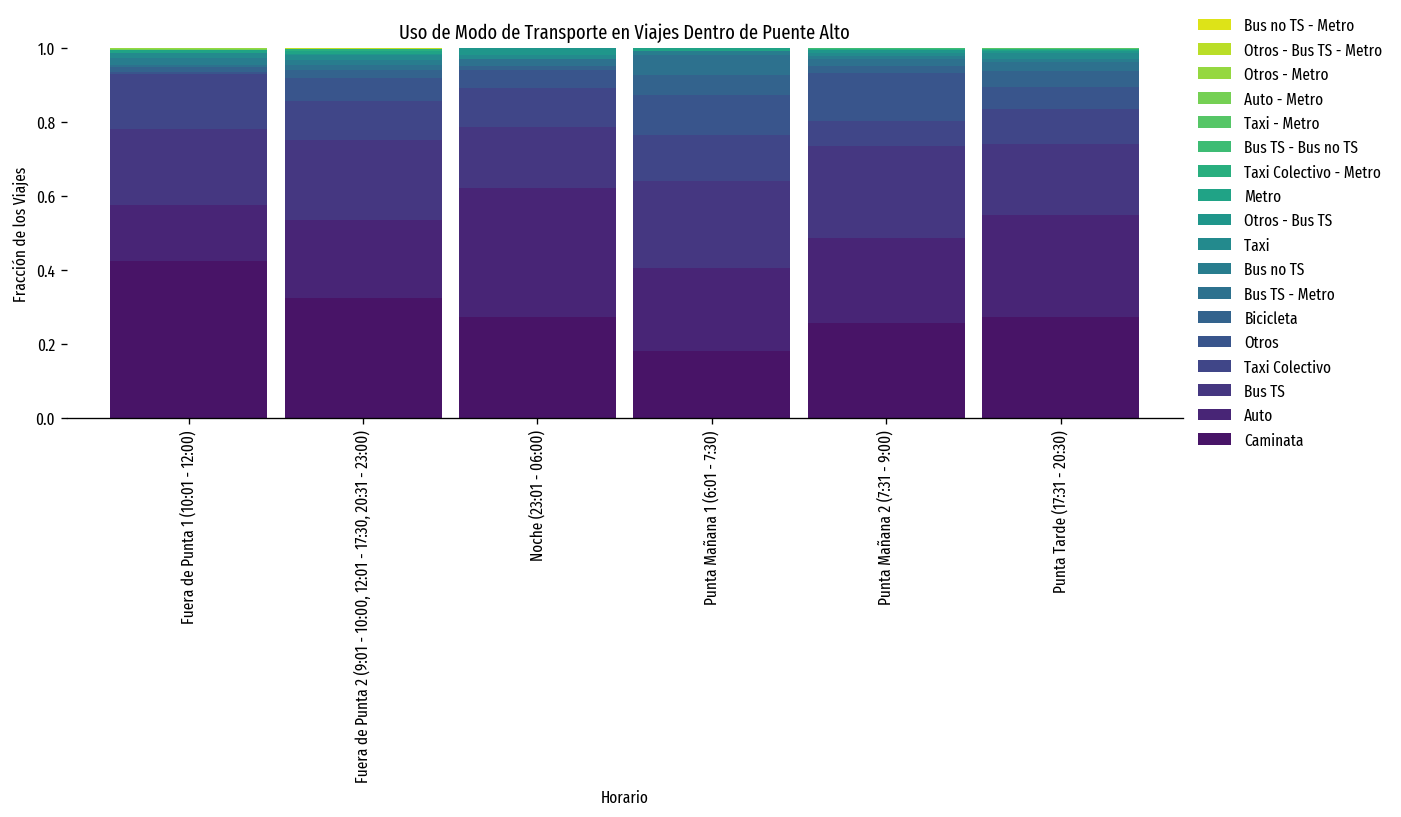

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

barchart(ax, viajes_short.loc["Puente Alto", "Puente Alto"], stacked=True, sort_categories=True, sort_items=False, normalize=True, palette="viridis")

ax.set_title("Uso de Modo de Transporte en Viajes Dentro de Puente Alto")
ax.set_ylim([0, 1])
ax.set_xlabel("Horario")
ax.set_ylabel("Fracción de los Viajes")

Text(0, 0.5, 'Fracción de los Viajes')

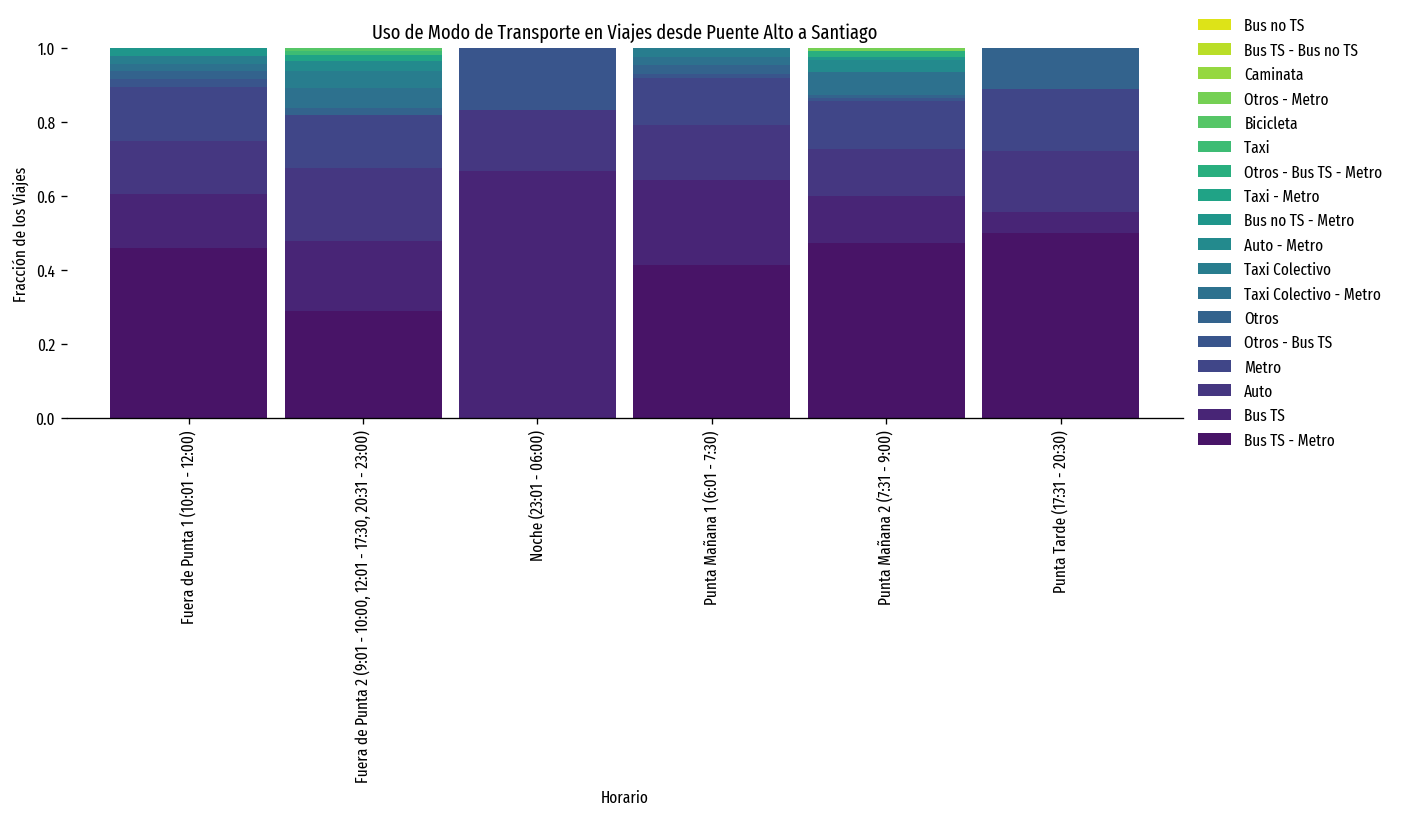

In [45]:
ig, ax = plt.subplots(1, 1, figsize=(12, 4))

barchart(ax, viajes_short.loc["Puente Alto", "Santiago"], stacked=True, sort_categories=True, sort_items=False, normalize=True, palette="viridis")

ax.set_title("Uso de Modo de Transporte en Viajes desde Puente Alto a Santiago")
ax.set_ylim([0, 1])
ax.set_xlabel("Horario")
ax.set_ylabel("Fracción de los Viajes")

In [39]:
from aves.features.geo import to_point_geodataframe

origenes_viajes = to_point_geodataframe(
    viajes[viajes["ComunaOrigen"].isin(zones["Comuna"])],
    "OrigenCoordX",
    "OrigenCoordY",
    crs="epsg:5361",
)

origenes_viajes = origenes_viajes[pd.notnull(origenes_viajes["TripWeight"])]

destinos_viajes = to_point_geodataframe(
    viajes[viajes["ComunaDestino"].isin(zones["Comuna"])],
    "DestinoCoordX",
    "DestinoCoordY",
    crs="epsg:5361",
)

destinos_viajes = destinos_viajes[pd.notnull(destinos_viajes["TripWeight"])]

zones_utm = zones.to_crs(origenes_viajes.crs)

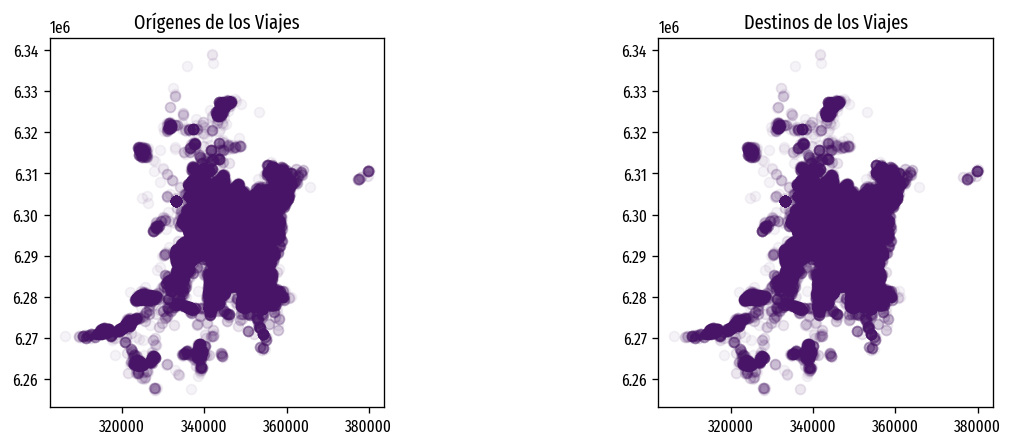

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title("Orígenes de los Viajes")
origenes_viajes.plot(ax=ax1, alpha=0.05)
ax2.set_title("Destinos de los Viajes")
destinos_viajes.plot(ax=ax2, alpha=0.05)

plt.draw()

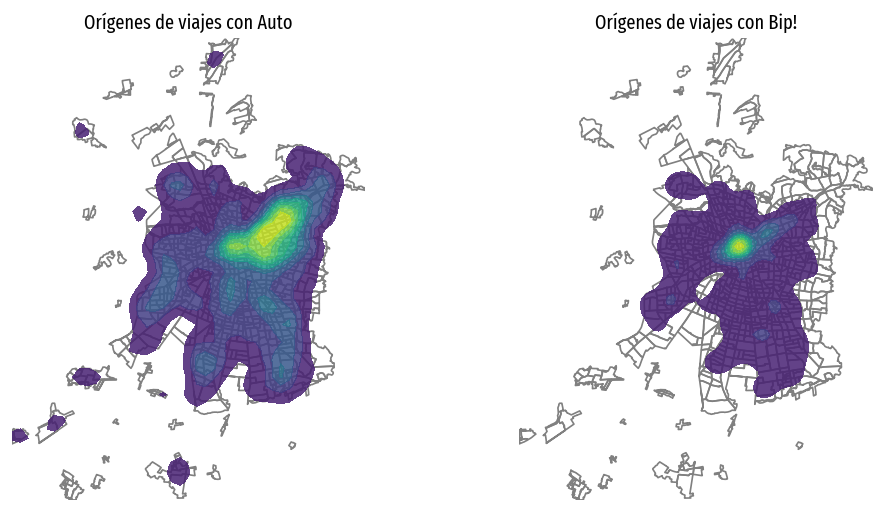

In [41]:
from aves.visualization.maps import heat_map
from aves.visualization.figures import small_multiples_from_geodataframe

fig, axes = small_multiples_from_geodataframe(zones_utm, n_variables=2, col_wrap=2)

for ax, key in zip(axes, ("Auto", "Bip!")):
    zones_utm.plot(ax=ax, color="none", edgecolor="grey")
    group_df = origenes_viajes[origenes_viajes["ModoDifusion"] == key]
    heat_map(
        ax,
        group_df,
        weight="TripWeight",
        bandwidth=1000,
        n_levels=10,
        kernel="gaussian",
        low_threshold=0.05,
        alpha=0.85,
    palette="viridis",
    )
    ax.set_title(f"Orígenes de viajes con {key}")